# **Name : Anuvind M P**
# **Roll no : AM.EN.U4AIE22010**

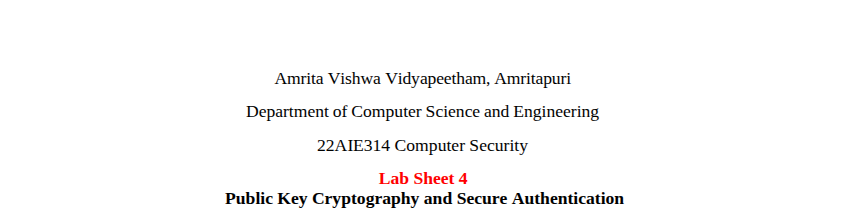

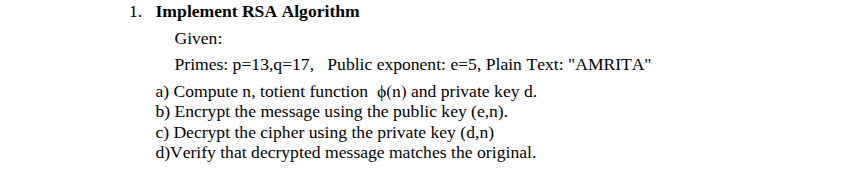

In [3]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def modinv(e, phi):
    t, newt = 0, 1
    r, newr = phi, e
    while newr != 0:
        quotient = r // newr
        t, newt = newt, t - quotient * newt
        r, newr = newr, r - quotient * newr
    if r > 1:
        raise Exception("No inverse exists")
    if t < 0:
        t += phi
    return t

def encrypt_char(m, e, n):
    return pow(m, e, n)

def decrypt_char(c, d, n):
    return pow(c, d, n)


In [4]:
p = 13
q = 17
e = 5
text = "AMRITA"


In [5]:
# a)
n = p * q
phi = (p - 1) * (q - 1)
d = modinv(e, phi)
print("\na) Compute n, φ(n), and d")
print(f"p = {p}, q = {q}")
print(f"n = p * q = {n}")
print(f"φ(n) = (p-1)*(q-1) = {phi}")
print(f"Public exponent e = {e}")
print(f"Private key d = {d}")


a) Compute n, φ(n), and d
p = 13, q = 17
n = p * q = 221
φ(n) = (p-1)*(q-1) = 192
Public exponent e = 5
Private key d = 77


In [6]:
# b)
ascii_vals = [ord(c) for c in text]
ciphertext = [encrypt_char(m, e, n) for m in ascii_vals]
print("\nb) Encryption using public key (e, n)")
print(f"Plaintext = {text}")
print(f"ASCII values = {ascii_vals}")
print(f"Ciphertext = {ciphertext}")


b) Encryption using public key (e, n)
Plaintext = AMRITA
ASCII values = [65, 77, 82, 73, 84, 65]
Ciphertext = [182, 25, 114, 99, 67, 182]


In [7]:
# c)
decrypted_vals = [decrypt_char(c, d, n) for c in ciphertext]
decrypted_text = ''.join(chr(m) for m in decrypted_vals)
print("\nc) Decryption using private key (d, n)")
print(f"Decrypted ASCII values = {decrypted_vals}")
print(f"Decrypted Text = {decrypted_text}")


c) Decryption using private key (d, n)
Decrypted ASCII values = [65, 77, 82, 73, 84, 65]
Decrypted Text = AMRITA


In [8]:
# d)
print("\nd) Verification")
if decrypted_text == text:
    print("Decrypted message matches original.")
else:
    print("Decrypted message does NOT match original.")


d) Verification
Decrypted message matches original.


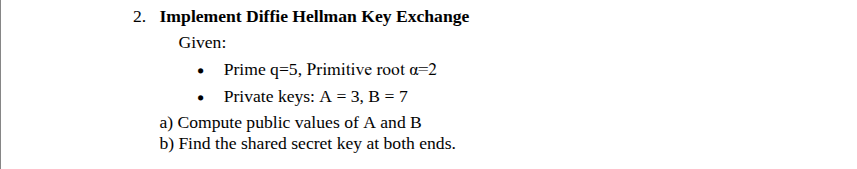

In [11]:
def diffie_hellman(q, alpha, private_a, private_b):
    A_pub = pow(alpha, private_a, q)
    B_pub = pow(alpha, private_b, q)
    shared_key_a = pow(B_pub, private_a, q)
    shared_key_b = pow(A_pub, private_b, q)

    return A_pub, B_pub, shared_key_a, shared_key_b

In [12]:
q = 5
alpha = 2
private_a = 3
private_b = 7

In [13]:
# a)
A_pub, B_pub, key_a, key_b = diffie_hellman(q, alpha, private_a, private_b)
print("\na) Compute Public Values")
print(f"Prime q = {q}, Primitive root α = {alpha}")
print(f"Private Key A = {private_a}, B = {private_b}")
print(f"Public Key A_pub = α^A mod q = {A_pub}")
print(f"Public Key B_pub = α^B mod q = {B_pub}")


a) Compute Public Values
Prime q = 5, Primitive root α = 2
Private Key A = 3, B = 7
Public Key A_pub = α^A mod q = 3
Public Key B_pub = α^B mod q = 3


In [14]:
# b)
print("\nb) Shared Secret Key")
print(f"Shared Key at A's end: (B_pub)^A mod q = {key_a}")
print(f"Shared Key at B's end: (A_pub)^B mod q = {key_b}")
if key_a == key_b:
    print(f"Shared key matched: {key_a}")
else:
    print("Shared keys do not match.")



b) Shared Secret Key
Shared Key at A's end: (B_pub)^A mod q = 2
Shared Key at B's end: (A_pub)^B mod q = 2
Shared key matched: 2
